In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree

In [7]:
df = pd.read_csv("task10_dataset.csv")

In [8]:
df.head()

,IDINT,IDPAC,NrInt,Sex,VAn,VLu,VNorm,Jud,AnEx,LuEx,...,ULCER3,ULCER4,ULCER5,ULCER6,STOMUCCORP,STOMUCCORP2,STOMUCCORP3,STOMUCCORP4,STOMUCCORP5,STOMUCCORP6
0,2958,3,1,F,12,6,12.5,CJ,2006,1,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
1,3116,3,2,F,12,6,12.5,CJ,2006,5,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
2,2649,8,1,F,18,0,18.0,CJ,2005,1,...,NU,NaN,NaN,NaN,N,N,N,NaN,NaN,NaN
3,2813,8,2,F,18,0,18.0,CJ,2005,6,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
4,3718,8,3,F,18,0,18.0,CJ,2008,3,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['IDINT', 'IDPAC', 'NrInt', 'Sex', 'VAn', 'VLu', 'VNorm', 'Jud', 'AnEx',
       'LuEx',
       ...
       'ULCER3', 'ULCER4', 'ULCER5', 'ULCER6', 'STOMUCCORP', 'STOMUCCORP2',
       'STOMUCCORP3', 'STOMUCCORP4', 'STOMUCCORP5', 'STOMUCCORP6'],
      dtype='object', length=112)

In [10]:
classes = df.STOMUCCORP.unique()
classes

array(['N', 'NOD-ERI', 'HEMOR', 'ATROFIC', 'NODULAR', 'ERITEM', 'EROZIV',
       'HIPER', 'NOD-AT'], dtype=object)

columns = (df.columns).to_numpy()
columns

In [12]:
no_consultations = 6
first_symptom_index = np.where(columns == "SDA")[0][0]
no_consultations, first_symptom_index

(6, 10)

In [13]:
patient_data = columns[1:10]
useless = ['VNorm', 'NrInt','IDPAC', 'VAn', 'VLu', 'Jud', 'AnEx', 'LuEx']
for elem in useless:
    patient_data = patient_data[patient_data != elem]
patient_data

array(['Sex'], dtype=object)

In [14]:
consults = np.empty([6, 17], dtype=object)

consults[0].shape

(17,)

In [15]:
consults = np.empty([6, 17], dtype=object)
for i in range(0, 6):
    cons_i = []
    for pos, val in enumerate(columns):
        if pos >= first_symptom_index and ((pos - first_symptom_index) % no_consultations == i):
            cons_i = np.append(cons_i, val)
    consults[i] = cons_i
    print(consults[i])

['SDA' 'SDE' 'VAR' 'HIPO' 'ANEMIE' 'AA' 'HDSI' 'GAS' 'GASHP' 'ESOFAGITA'
 'ANO' 'BC' 'CEFALEE' 'CONS' 'DRE' 'ULCER' 'STOMUCCORP']
['SDA2' 'SDE2' 'VAR2' 'HIPO2' 'ANEMIE2' 'AA2' 'HDSI2' 'GAS2' 'GASHP2'
 'ESOFAGITA2' 'ANO2' 'BC2' 'CEFALEE2' 'CONS2' 'DRE2' 'ULCER2'
 'STOMUCCORP2']
['SDA3' 'SDE3' 'VAR3' 'HIPO3' 'ANEMIE3' 'AA3' 'HDSI3' 'GAS3' 'GASHP3'
 'ESOFAGITA3' 'ANO3' 'BC3' 'CEFALEE3' 'CONS3' 'DRE3' 'ULCER3'
 'STOMUCCORP3']
['SDA4' 'SDE4' 'VAR4' 'HIPO4' 'ANEMIE4' 'AA4' 'HDSI4' 'GAS4' 'GASHP4'
 'ESOFAGITA4' 'ANO4' 'BC4' 'CEFALEE4' 'CONS4' 'DRE4' 'ULCER4'
 'STOMUCCORP4']
['SDA5' 'SDE5' 'VAR5' 'HIPO5' 'ANEMIE5' 'AA5' 'HDSI5' 'GAS5' 'GASHP5'
 'ESOFAGITA5' 'ANO5' 'BC5' 'CEFALEE5' 'CONS5' 'DRE5' 'ULCER5'
 'STOMUCCORP5']
['SDA6' 'SDE6' 'VAR6' 'HIPO6' 'ANEMIE6' 'AA6' 'HDSI6' 'GAS6' 'GASHP6'
 'ESOFAGITA6' 'ANO6' 'BC6' 'CEFALEE6' 'CONS6' 'DRE6' 'ULCER6'
 'STOMUCCORP6']


In [16]:
first_consult = np.append(patient_data, consults[0])
first_consult

array(['Sex', 'SDA', 'SDE', 'VAR', 'HIPO', 'ANEMIE', 'AA', 'HDSI', 'GAS',
       'GASHP', 'ESOFAGITA', 'ANO', 'BC', 'CEFALEE', 'CONS', 'DRE',
       'ULCER', 'STOMUCCORP'], dtype=object)

In [17]:
first_df = df[first_consult]

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
first_df_encoded = first_df.apply(le.fit_transform)
first_df_encoded

,Sex,SDA,SDE,VAR,HIPO,ANEMIE,AA,HDSI,GAS,GASHP,ESOFAGITA,ANO,BC,CEFALEE,CONS,DRE,ULCER,STOMUCCORP
0,0,1,0,1,0,1,1,2,1,1,1,1,1,1,1,1,0,5
1,0,1,1,1,0,1,1,2,1,1,1,1,1,1,1,1,0,5
2,0,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,0,5
3,0,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,0,5
4,0,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1,1,0,1,1,1,1,2,1,1,1,1,1,1,1,1,0,5
495,0,1,1,1,0,1,1,2,1,1,1,0,1,1,1,1,0,5
496,0,1,1,1,1,1,1,2,0,1,1,0,1,1,1,1,0,0
497,0,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,0,5


In [19]:
first_x = first_df_encoded.iloc[:,:-1]   # features - everything but the label
first_y = first_df_encoded.iloc[:,-1:]   # label - last column

In [20]:
first_x

,Sex,SDA,SDE,VAR,HIPO,ANEMIE,AA,HDSI,GAS,GASHP,ESOFAGITA,ANO,BC,CEFALEE,CONS,DRE,ULCER
0,0,1,0,1,0,1,1,2,1,1,1,1,1,1,1,1,0
1,0,1,1,1,0,1,1,2,1,1,1,1,1,1,1,1,0
2,0,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,0
3,0,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,0
4,0,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1,1,0,1,1,1,1,2,1,1,1,1,1,1,1,1,0
495,0,1,1,1,0,1,1,2,1,1,1,0,1,1,1,1,0
496,0,1,1,1,1,1,1,2,0,1,1,0,1,1,1,1,0
497,0,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,0


In [21]:
first_y

,STOMUCCORP
0,5
1,5
2,5
3,5
4,5
...,...
494,5
495,5
496,0
497,5


In [22]:
print(first_x.shape, " ", first_y.shape)

(499, 17)   (499, 1)


In [23]:
train_x, test_x, train_y, test_y = train_test_split(first_x, first_y, test_size=0.25, random_state=42)

# I tried to stratify the train/test sets using first_y, but there was only one member for a certain class
# thus the stratification was impossible (sklearn threw an error)

In [24]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=14)

In [25]:
clf.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', random_state=14)

In [26]:
dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names=first_x.columns,
                                class_names=classes,
                                filled=True,
                                rounded=True)
graph = graphviz.Source(dot_data)

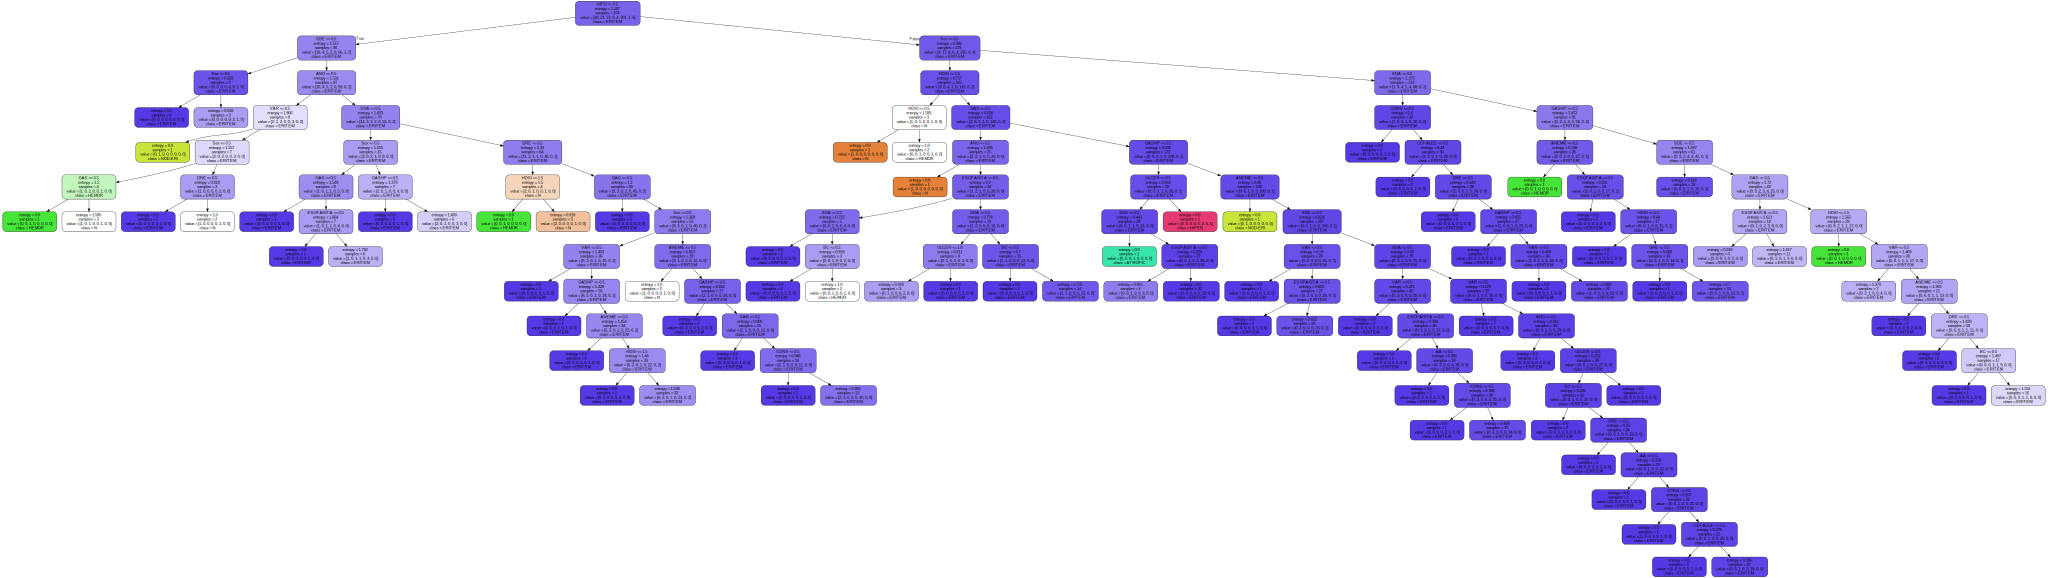

In [27]:
graph

In [28]:
clf.score(test_x, test_y)

0.696

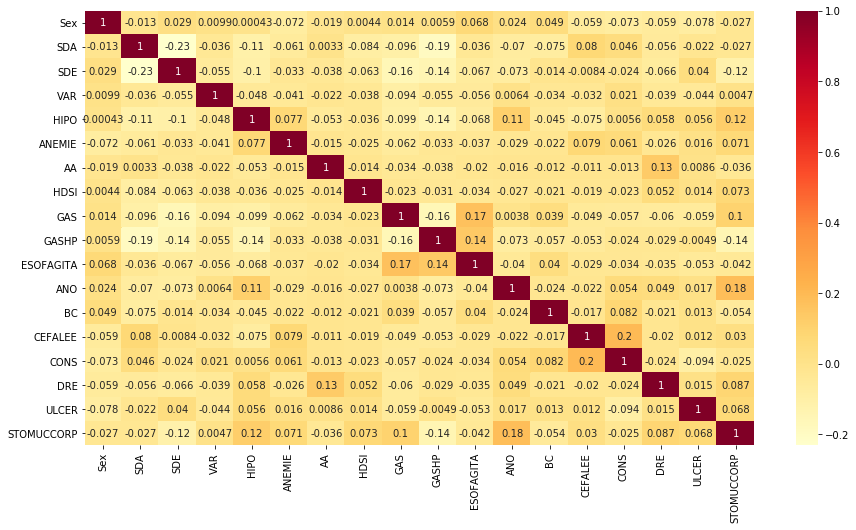

In [29]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(first_df_encoded.corr(), cmap ='YlOrRd', annot = True)  # Wistia is also a good colour map
plt.show()

In [31]:
first_df_encoded.corr()['STOMUCCORP'].abs().sort_values().tail()

SDE           0.115106
HIPO          0.121831
GASHP         0.143644
ANO           0.182798
STOMUCCORP    1.000000
Name: STOMUCCORP, dtype: float64